In [61]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import nltk
import statsmodels.api as sm

# for creating ridge plot
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm


import draft_prepare as prepare

pd.set_option('max_columns', 100)

mpl.style.use('seaborn')

In [5]:
pwd

'/Users/bfs7/codeup-data-science/song-lyrics-capstone/Drafts'

In [6]:
df = prepare.get_data('../songs_0526.csv')

Great Success!!!!!!!!!!!!!!!**


In [9]:
df = df.set_index('date')

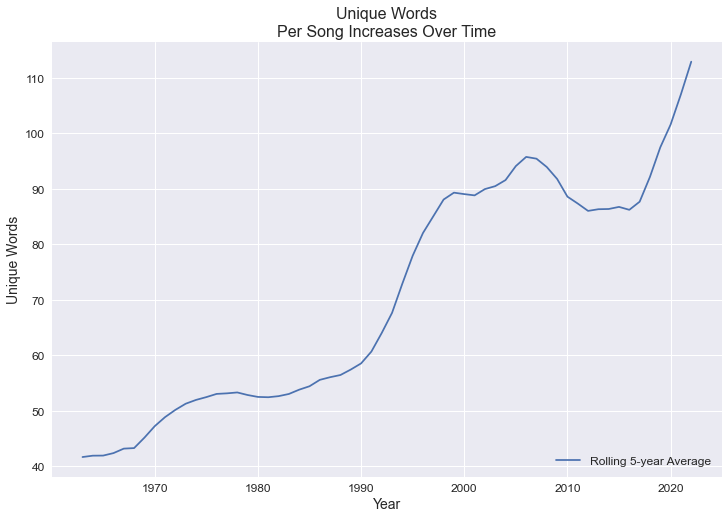

In [60]:
df2 = df[['unique_words_count', 'word_count']].resample('Y').mean().dropna().rolling(5).mean()

plt.figure(figsize=(12,8))
sns.lineplot(data=df2, x='date', y='unique_words_count')

plt.title('Unique Words\nPer Song Increases Over Time', fontsize=16)
plt.legend(['Rolling 5-year Average'], fontsize=12, loc='lower right')
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Unique Words', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [64]:
df.head(2)

,title,artist,lyrics,raw_lyrics,decade,character_count,word_count,unique_words,unique_words_count,sentiment,sentiment_category,place_words,chorus_count,verse_count,verse_chorus_ratio,pre_chorus_count,outro_count,bridge_count,hook_count,bigrams,trigrams
date,,,,,,,,,,,,,,,,,,,,,
2001-10-20,#1,Nelly,uh uh uh got bring attention dirty better watc...,#1 LyricsUh uh uh I just gotta bring it to the...,2000,2014,363,whole eh cmon sleeve hold girl chain half much...,228,0.9915,very positive,[hook] [hook] [hook],0,0,0.0,0,0,0,3,"[(uh, uh), (uh, uh), (uh, got), (got, bring), ...","[(uh, uh, uh), (uh, uh, got), (uh, got, bring)..."
1974-12-21,#9 Dream,John Lennon,long ago dream dream know yes know seemed real...,#9 Dream Lyrics[Verse 1] So long ago Was it in...,1970,842,135,sound say started air river dance tree spirit ...,49,0.9169,very positive,[verse 1] [pre-chorus 1] [chorus] [verse 2] [p...,2,2,1.0,2,1,0,0,"[(long, ago), (ago, dream), (dream, dream), (d...","[(long, ago, dream), (ago, dream, dream), (dre..."


In [66]:
df['love_count'] = df.lyrics.str.count('love')

In [67]:
df['like_count'] = df.lyrics.str.count('like')

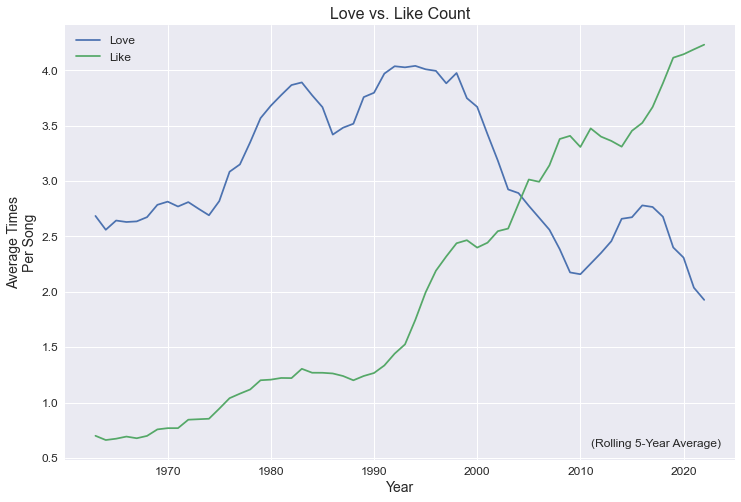

In [103]:
df2 = df[['love_count', 'like_count']].resample('Y').mean().dropna().rolling(5).mean()

plt.figure(figsize=(12,8))
sns.lineplot(data=df2, x='date', y='love_count')
sns.lineplot(data=df2, x='date', y='like_count')

plt.title('Love vs. Like Count', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Average Times\nPer Song', fontsize='14')
plt.yticks(fontsize=12)
plt.legend(['Love', 'Like'], fontsize=12)

plt.annotate('(Rolling 5-Year Average)', 
             xy=(pd.to_datetime('2011'), .6), 
             xytext=(pd.to_datetime('2011'), .6),
             fontsize=12)

plt.show()

In [104]:
# combine all strings in lyrics where decade is the same
decades = (
    df.groupby("decade")["lyrics"].apply(lambda x: " ".join(x)).reset_index()
)
decades.rename(columns={"lyrics": "all_words"}, inplace=True)
decades["unique_words"] = (
    df.groupby("decade")["unique_words"].apply(lambda x: " ".join(x)).values
)
# decades["common_unique_words"] = decades.unique_words.apply(get_common_unique_words)
decades["n_words"] = decades["all_words"].apply(lambda x: len(x.split()))
decades["unique_word_count"] = decades["all_words"].apply(
    lambda x: len(set(x.split()))
)
decades["mean_word_count"] = (
    df.groupby("decade")["word_count"].mean().values.round(1)
)
decades["median_word_count"] = (
    df.groupby("decade")["word_count"].median().values.round(1)
)
decades["most_common_word"] = decades["unique_words"].apply(
    lambda x: n_most_common_word(x)
)
decades["2nd_most_common_word"] = decades["unique_words"].apply(
    lambda x: n_most_common_word(x, 2)
)
decades["3rd_most_common_word"] = decades["unique_words"].apply(
    lambda x: n_most_common_word(x, 3)
)
decades["4th_most_common_word"] = decades["unique_words"].apply(
    lambda x: n_most_common_word(x, 4)
)
decades["5th_most_common_word"] = decades["unique_words"].apply(
    lambda x: n_most_common_word(x, 5)
)

NameError: name 'n_most_common_word' is not defined